In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [5]:
#Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width': iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
x=data[['sepal length', 'sepal width', 'petal length', 'petal width']]#Features
y=data['species'] # Labels
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [21]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [22]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [23]:
#Train the model using the training sets y_pred=clf.predict(x_test)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
y_pred=clf.predict(x_test)

In [25]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [26]:
clf.feature_importances_

array([0.09375804, 0.0263987 , 0.42086809, 0.45897518])

In [27]:
#Feature Selection
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names)
feature_imp

sepal length (cm)    0.093758
sepal width (cm)     0.026399
petal length (cm)    0.420868
petal width (cm)     0.458975
dtype: float64

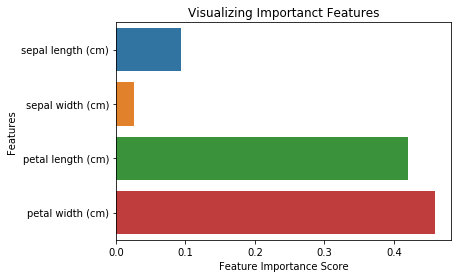

In [29]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# Creating a bar plot
sb.barplot(x=feature_imp, y=feature_imp.index)
#Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Importanct Features")
plt.show()

So we see that petal length and petal width is very important